<a href="https://colab.research.google.com/github/joyinning/causal_inference/blob/main/Causal_Week_6_1_(A).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resource: https://matheusfacure.github.io/python-causality-handbook/19-Evaluating-Causal-Models.html

# Chapter 19

## Concepts

### How should we evaluate causal inference models with real data?


**Question 1 Why is it hard to use train-test methods, commonly in predictive modeling, for causal inference models?**

In causal inference, the goal is often to estimate the effect of an intervention, which means determining what would happen both with and without the intervention for the same unit at the same time. This counterfactual nature (what could have happened) makes it difficult to directly apply train-test methods, which rely on observing actual outcomes.


**Question 2 How does aggregate sensitivity analysis help in evaluating causal models?**

Aggregate sensitivity analysis examines how changes in model assumptions or inputs affect outcomes across a group or dataset, rather than focusing on individual predictions. This is useful in causal inference because it helps assess the robustness and generalizability of the conclusions under different scenarios, providing a clearer overall picture when individual outcomes can't be directly compared or validated.


### Causal Inference Focus: *what is the effect of changing the price on sales, given specific conditions?*


**Question 3 How can we simulate the counterfactual scenario to understand what would have happened had the treatment been different, and how do we evaluate these simulations for accuracy and effectiveness?**

Challenge: to simulate the counterfactual scenario - what would have happened had the treatment (the price) been different?


Solution: the randomized test set enables the validation of the causal model’s ability to predict outcomes under conditions that mimic an ideal randomized controlled trial.
- the model's ability to generalize and susceptibility to overfitting or underfitting to patterns (do not represent causal effects).

Using randomized data to validate causal inference models is crucial because it provides a controlled environment where the only varying factor is the treatment or intervention, in this case, the price of ice cream. This setup helps to mitigate the influence of confounding variables that may otherwise bias the results when using non-randomized, observational data.


### Sensitivity by Model Band


The idea of making treatment sensitivity models came from the necessity of finding which units are more sensitive to the treatment and which are less.

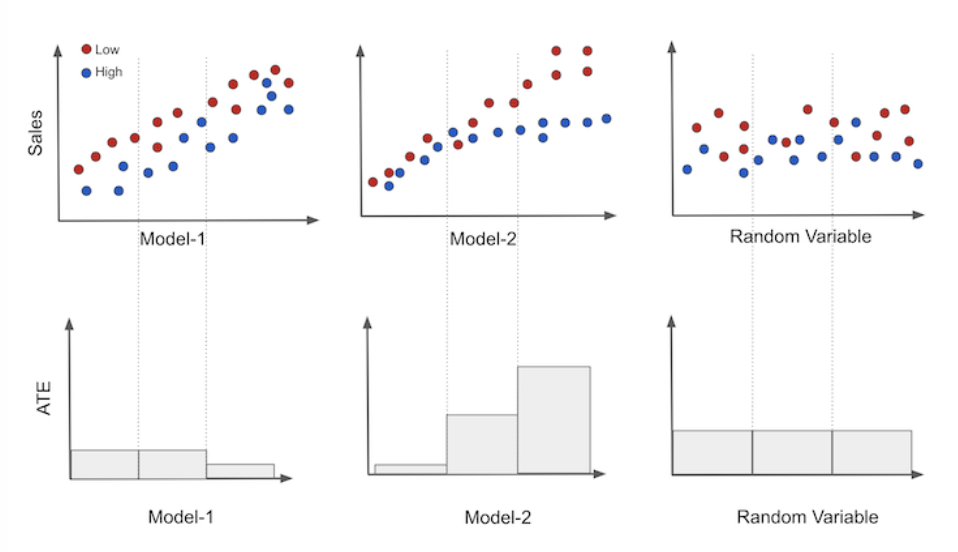

        The more ordered the sensitivities look like and the more different they are between bands, the better.
The effectiveness of the models increases with the degree of differentiation and ordering in the sensitivity across groups. Therefore, Model 2, which shows the greatest variation and distinct ordering among sensitivities, is superior to Model 1. Model 1, in turn, performs better than the Random model, which does not differentiate sensitivities effectively.


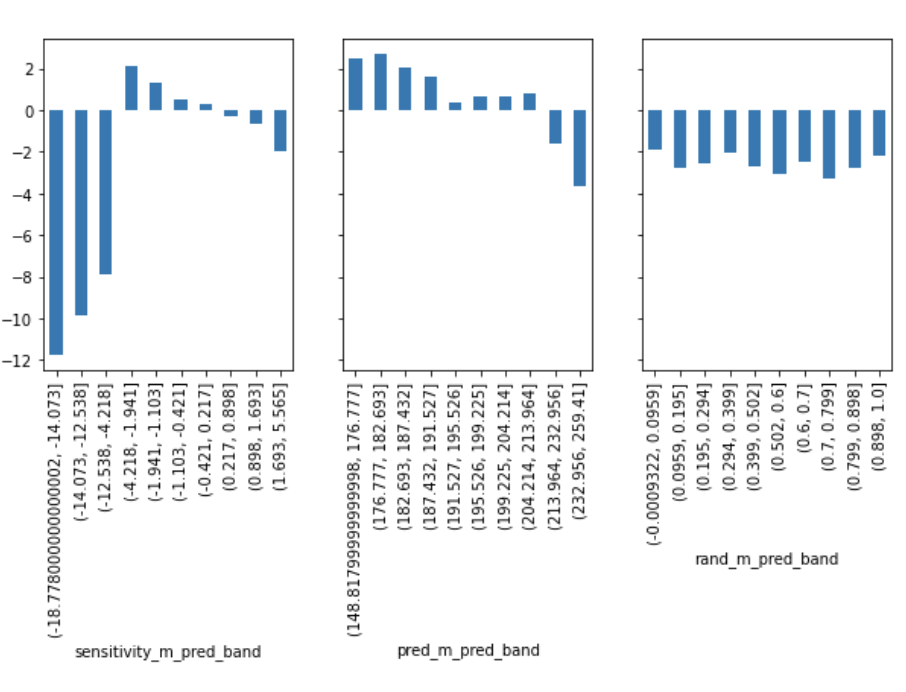

The predictive model has better prediction (more reliable for general forecasting), but the causal model can better identify the extremes.

**Question 4 In evaluating treatment sensitivity, the three models demonstrate varying capabilities regarding the effects on treated and untreated groups, and sensitivity differentiation. (Refer to the images provided as references)**

1. Random Model: This model produces uniform sensitivity estimates across its segments, indicating an inability to distinguish between days of high and low sensitivity. Serving as a baseline, it demonstrates that without a systematic approach, sensitivity appears consistent across different groups.
2. Predictive Model: This model successfully creates groups with distinctly high and low sensitivities to treatment. It effectively segments the data to reflect varying treatment effects, which can be particularly useful for targeted and optimized interventions.
3. Causal Model: The causal model excels at identifying groups with very low treatment sensitivity—where "treatment sensitivity" implies a significant negative impact on outcomes as prices increase (indicating high price sensitivity). It also identifies groups with lesser sensitivity, effectively distinguishing between extremes and demonstrating a nuanced understanding of how treatment effects vary across different subpopulations.


**Question 5 In the text, “Finally, the random model produces groups with the exact same sensitivity. That’s not very useful, but it’s expected.” What is the meaning of ‘That’s not very useful, but it’s expected.’?**

1. Not useful: it does not contribute to understanding or distinguishing between different sensitivities across groups or segments.
2. But Expected: This uniformity in results across groups is expected when using a model that does not distinguish between different inputs in any statistically meaningful way.


> **“Overall, while the predictive model shows better segmentation ability, the causal model provides deeper insights into the extreme variations in sensitivity, which is crucial for precise intervention planning.”**


### Cumulative Sensitivity Curve

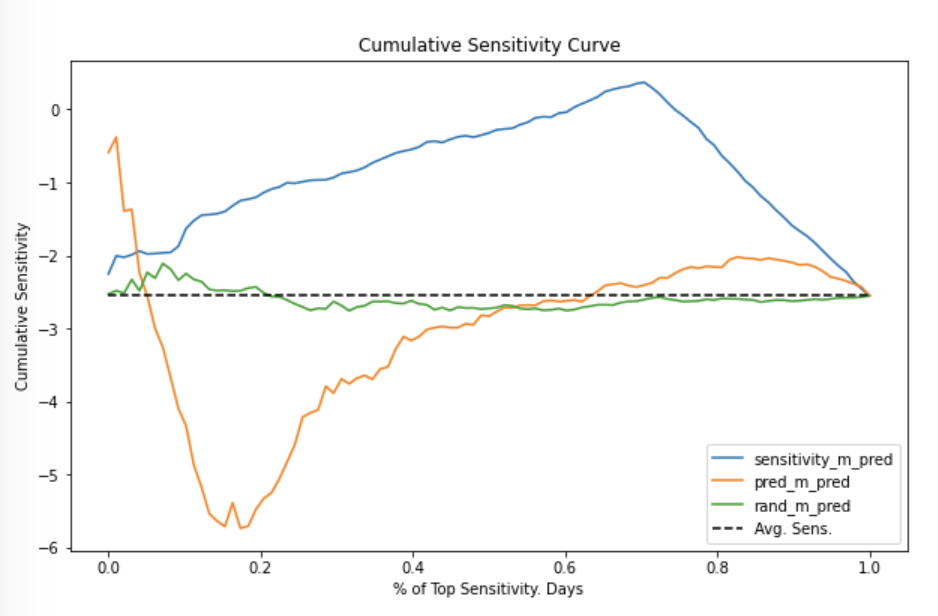

The reason is that, due to sample size, the sensitivity can be too noisy at the beginning of the curve. To fix that, we can pass a first group which is already large enough.

In the case, we want the highest sensitivity for the largest possible sample.
1. Rand_m: the model can’t find groups where the sensitivity is different from the average one.
2. Pred_m: it appears to be reversibly ordering sensitivity, because the curve starts below the average sensitivity.
3. Sensitivity_m: Where the cumulative sensitivity increases away from the average, but then it reaches a point where we can treat about 75% of the units while keeping a pretty decent sensitivity of almost 0.


**Question 6. Why is the Cumulative Sensitivity Curve important in evaluating different models such as random, predictive, and causal?**

The Cumulative Sensitivity Curve is crucial for assessing which model best orders the sensitivity across groups. A good model will show that the sensitivity observed in the top k samples is consistently higher than in the next set of samples, indicating effective prioritization and differentiation of treatment effects. This curve helps to verify that as more samples are considered, the observed sensitivity should ideally remain higher or equal, validating the model's ability to effectively stratify or segment the population based on their response to the treatment.


### Cumulative Gain Curve

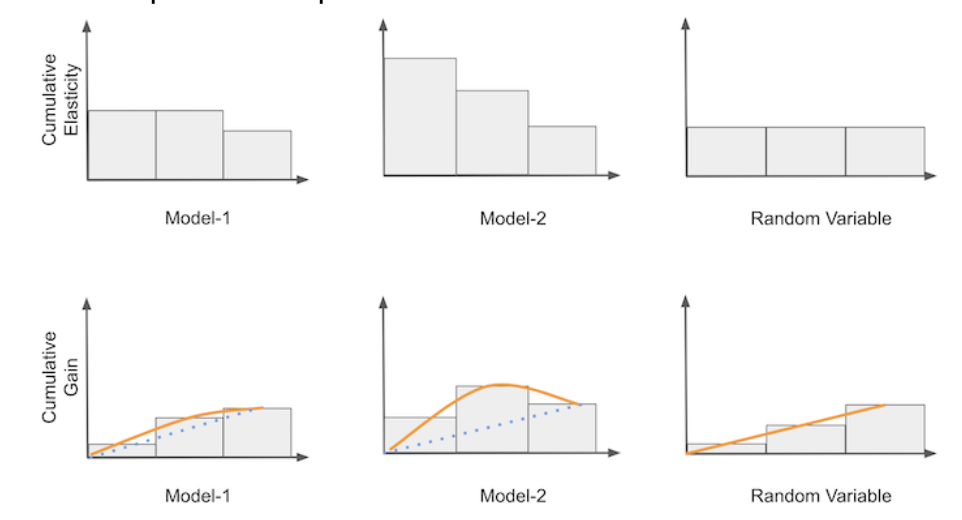

- The better the model at ordering sensitivity, the more the curve will diverge from the random line in the points between 0 and 1.
- M2 is better than M1 because it diverges more before reaching the ATE at the end point.


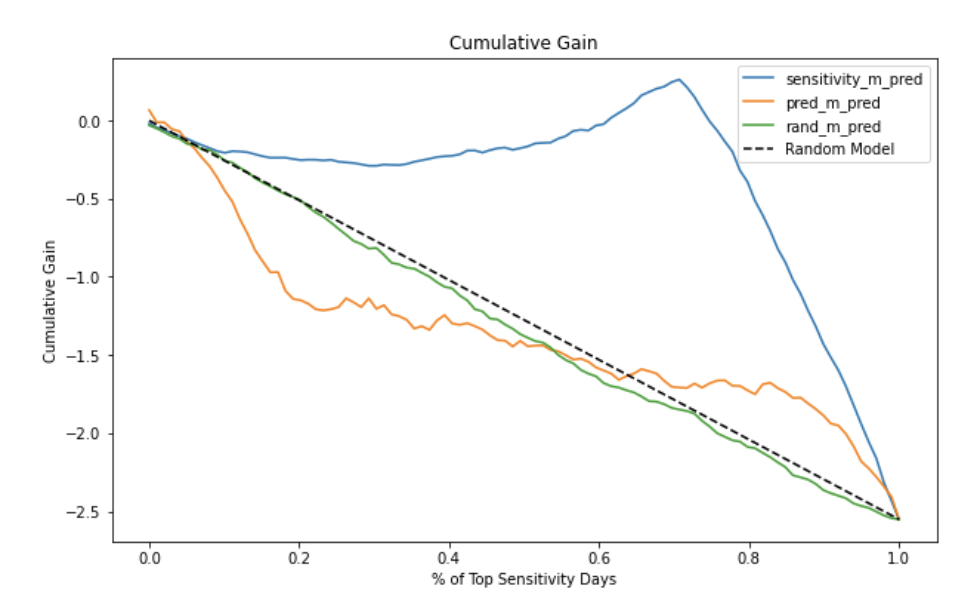

- Sensitivity_m is much better than the other two. It diverges much more from the random line than both rand_m and pred_m.
- How the actual random model follows very closely the theoretical random model. The difference between both is probably just random noise.


**Question 7. Why is the Cumulative Gain Curve essential in model evaluation, especially for assessing treatment sensitivity?**
The Cumulative Gain Curve is critical for assessing how well a model orders treatment sensitivity across a population.

### Taking Variance into Account

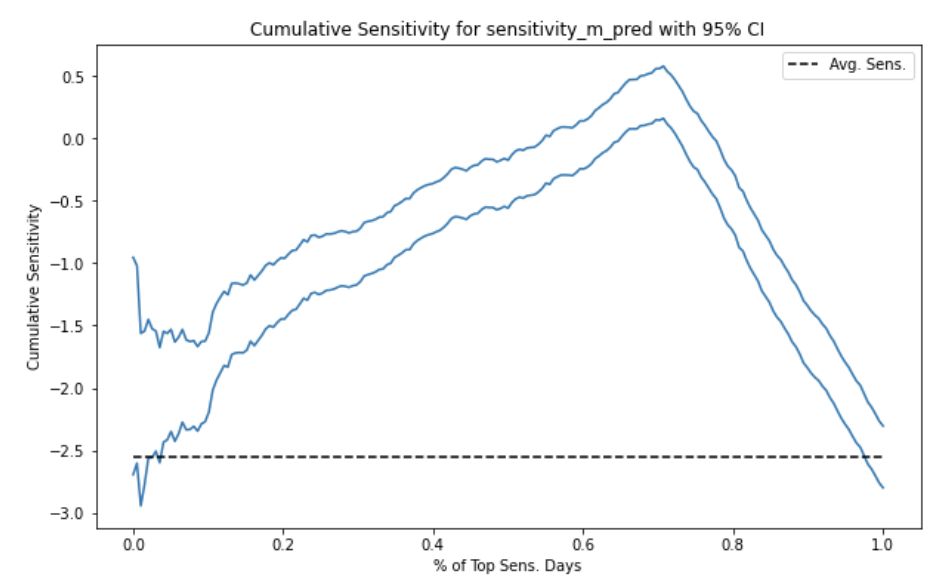

The confidence interval gets smaller and smaller as we accumulate more of the dataset in cumulative sensitivity.

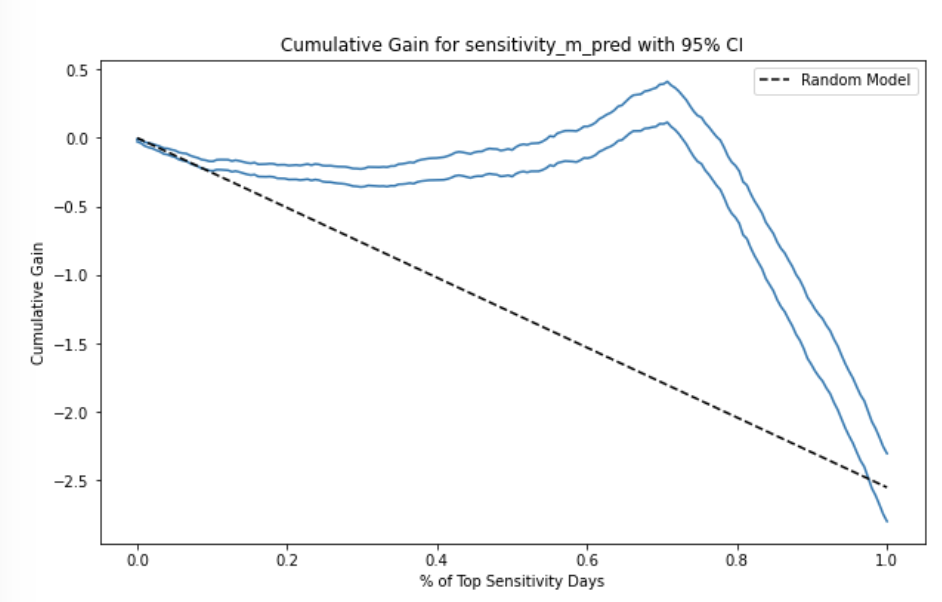

Even though the sample size is smaller at the beginning of the curve, the confidence interval starts small.
The reason is that the normalization factor shinks the ATE parameter and it’s confidence interval along with it.


**Question 8: Why is it important to take variance into account when analyzing sensitivity curves in causal inference?**

It provides a measure of confidence in the estimates of treatment effects across different segments of the dataset. By adding confidence intervals around the sensitivity curves, we can better understand the reliability and stability of the estimated effects.

## Case Study

**Dataset**

1. age: Customer age.
2. gender: Customer gender (0 for male, 1 for female).
3. income: Monthly income of the customer.
4. campaign: the amount spent on a marketing campaign.
5. purchase_amount: Amount of money spent by the customer during the campaign.

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

num_samples = 1000
campaign_range = (0, 3000)

base_data = {
    'age': np.random.randint(18, 70, num_samples),
    'gender': np.random.randint(0, 2, num_samples),
    'income': np.random.randint(30000, 150000, num_samples),
    'campaign': np.random.uniform(*campaign_range, num_samples),
    'purchase_amount': np.random.normal(300, 100, num_samples)
}

# Non-random treatment dataset
data = base_data.copy()
data['campaign'] = np.where(data['age'] < 45,
                            np.random.uniform(1500, 3000, num_samples),
                            np.random.uniform(0, 1500, num_samples))
data['campaign'] += np.where(data['income'] > 100000,
                             np.random.uniform(500, 1500, num_samples),
                             0)
data['purchase_amount'] += (
    data['income'] * 0.001 +
    data['campaign'] * 0.2 +
    np.sqrt(data['campaign']) * 0.05 +
    (data['income'] / 1000) * np.log(data['campaign'] + 1) * 0.03
)

df = pd.DataFrame(data)

# Random treatment dataset
data2 = base_data.copy()
data2['purchase_amount'] += (
    data2['income'] * 0.001 +
    data2['campaign'] * 0.2 +
    np.sqrt(data2['campaign']) * 0.1 +
    (data2['income'] / 100000) * np.log(data2['campaign'] + 1) * 0.05
)

# Convert data2 to DataFrame
df2 = pd.DataFrame(data2)


# Create DataFrame
df = pd.DataFrame(data)
df2 = pd.DataFrame(data2)


In [ ]:
df.head()

,age,gender,income,campaign,purchase_amount
0,56,0,75648,535.473644,800.164011
1,69,0,133537,1820.841367,1060.853092
2,46,0,39516,279.629707,340.848670
3,32,1,142863,2870.022943,1391.510064
4,60,0,145005,1718.900580,1623.632053


In [ ]:
df2.head()

,age,gender,income,campaign,purchase_amount
0,56,0,75648,1102.603267,800.164011
1,69,0,133537,204.516928,1060.853092
2,46,0,39516,77.435721,340.848670
3,32,1,142863,405.498867,1391.510064
4,60,0,145005,2889.345335,1623.632053


### How does the amount spent on a marketing campaign influence customer purchase amounts, after controlling for age, gender, and income

**1 Create a Linear Regression Model** <br>
Use linear regression to model participation in a marketing campaign affect as a function of the purchase amount, age, gender, and income of customers.

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols('purchase_amount ~ age + C(gender) + income + campaign', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        purchase_amount   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     362.3
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          2.01e-192
Time:                        20:56:16   Log-Likelihood:                -6711.7
No. Observations:                1000   AIC:                         1.343e+04
Df Residuals:                     995   BIC:                         1.346e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        572.4346     37.168     15.

This regression model, which explains 59.3% of the variance in purchase amounts (R-squared = 59.3%), shows that both income and campaign spending significantly and positively influence purchase amounts. In contrast, age and gender do not have a statistically significant impact on purchase amounts according to the model results.

**2 Create a Fully Nonparametric Predictive Model** <br>
Implement a machine learning model using gradient boosting, then train and evaluate it to understand its predictive accuracy.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = ['age', 'gender', 'income', 'campaign']
y = ['purchase_amount']

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(df[X], df[y])

train_score = gbr.score(df[X], df[y])
test_score = gbr.score(df2[X], df2[y])
print(f"Train Score: {train_score:.2f}, Test Score: {test_score:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.72, Test Score: 0.40


1. Train Score (0.72): The model reasonably captures the variance in the training dataset (non-random dataset), explaining 72% of its variance. This indicates a good, but not perfect, fit to the training data.
2. Test Score (0.40): The performance drops significantly when the model is applied to unseen data, with only 37% of the variance explained. This substantial decrease suggests issues with the model's ability to generalize, indicating potential overfitting or model mismatch for the test data.
3. Overfitting: The gap of 0.32 between the training and testing scores is a clear indication of overfitting. This discrepancy suggests that the model may be too closely fitted to the noise or specific patterns in the training data, which do not generalize well to new data.








**3 Create Three Types of Models: Predictive, Causal, and Sensitivity** <br>
Construct models to compare their effectiveness in capturing the sensitivity of marketing campaign participation to changes in the purchase amount of customers.

In [ ]:
def inspect_predictions(df, model, h=10000):  # Adjust h to a larger value temporarily to inspect the impact
    df_plus_h = df.copy()
    df_minus_h = df.copy()
    df_plus_h['campaign'] = df['campaign'] + h
    df_minus_h['campaign'] = df['campaign'] - h

    predicted_plus_h = model.predict(df_plus_h[X])
    predicted_minus_h = model.predict(df_minus_h[X])

    # Inspecting the direct output differences
    print("Predictions with +h:", predicted_plus_h[:5])
    print("Predictions with -h:", predicted_minus_h[:5])

# Call the inspection function
inspect_predictions(df2, gbr, h=10)

Predictions with +h: [1049.65467849  958.48267252  671.80408933  912.07932219 1622.66954626]
Predictions with -h: [1049.65467849  958.48267252  718.69827986  889.56207631 1622.66954626]


In [ ]:
def predict_sensitivity(df, model, h=1600):
    df_plus_h = df.copy()
    df_minus_h = df.copy()
    df_plus_h['campaign'] = df['campaign'] + h
    df_minus_h['campaign'] = df['campaign'] - h

    predicted_plus_h = model.predict(df_plus_h[X])
    predicted_minus_h = model.predict(df_minus_h[X])
    sensitivity = (predicted_plus_h - predicted_minus_h) / (2 * h)
    return sensitivity

np.random.seed(123)
campaign_rnd_pred = df2.assign(
    sensitivity_m_pred=predict_sensitivity(df2, model),  # Sensitivity model
    pred_m_pred=gbr.predict(df2[X]),  # Predictive model
    rand_m_pred=np.random.uniform(size=df2.shape[0])  # Random model
)

campaign_rnd_pred.head()

,age,gender,income,campaign,purchase_amount,sensitivity_m_pred,pred_m_pred,rand_m_pred
0,56,0,75648,1102.603267,800.164011,0.209904,1049.654678,0.696469
1,69,0,133537,204.516928,1060.853092,0.209904,958.482673,0.286139
2,46,0,39516,77.435721,340.848670,0.209904,649.688057,0.226851
3,32,1,142863,405.498867,1391.510064,0.209904,806.259604,0.551315
4,60,0,145005,2889.345335,1623.632053,0.209904,1622.669546,0.719469


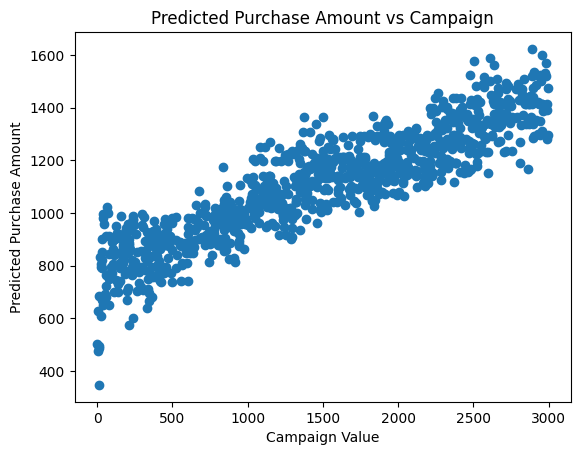

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df2['campaign'], gbr.predict(df2[X]))
plt.xlabel('Campaign Value')
plt.ylabel('Predicted Purchase Amount')
plt.title('Predicted Purchase Amount vs Campaign')
plt.show()


If the plot shows a linear relationship, this could explain the constant sensitivity.

**4 Calculate Sensitivity by Band and Plot the Results** <br>
Divide the data into bands based on predicted sensitivity and compute the sensitivity within each band to observe variations across the dataset. (Create the three models: predictive, causal, and random models.)

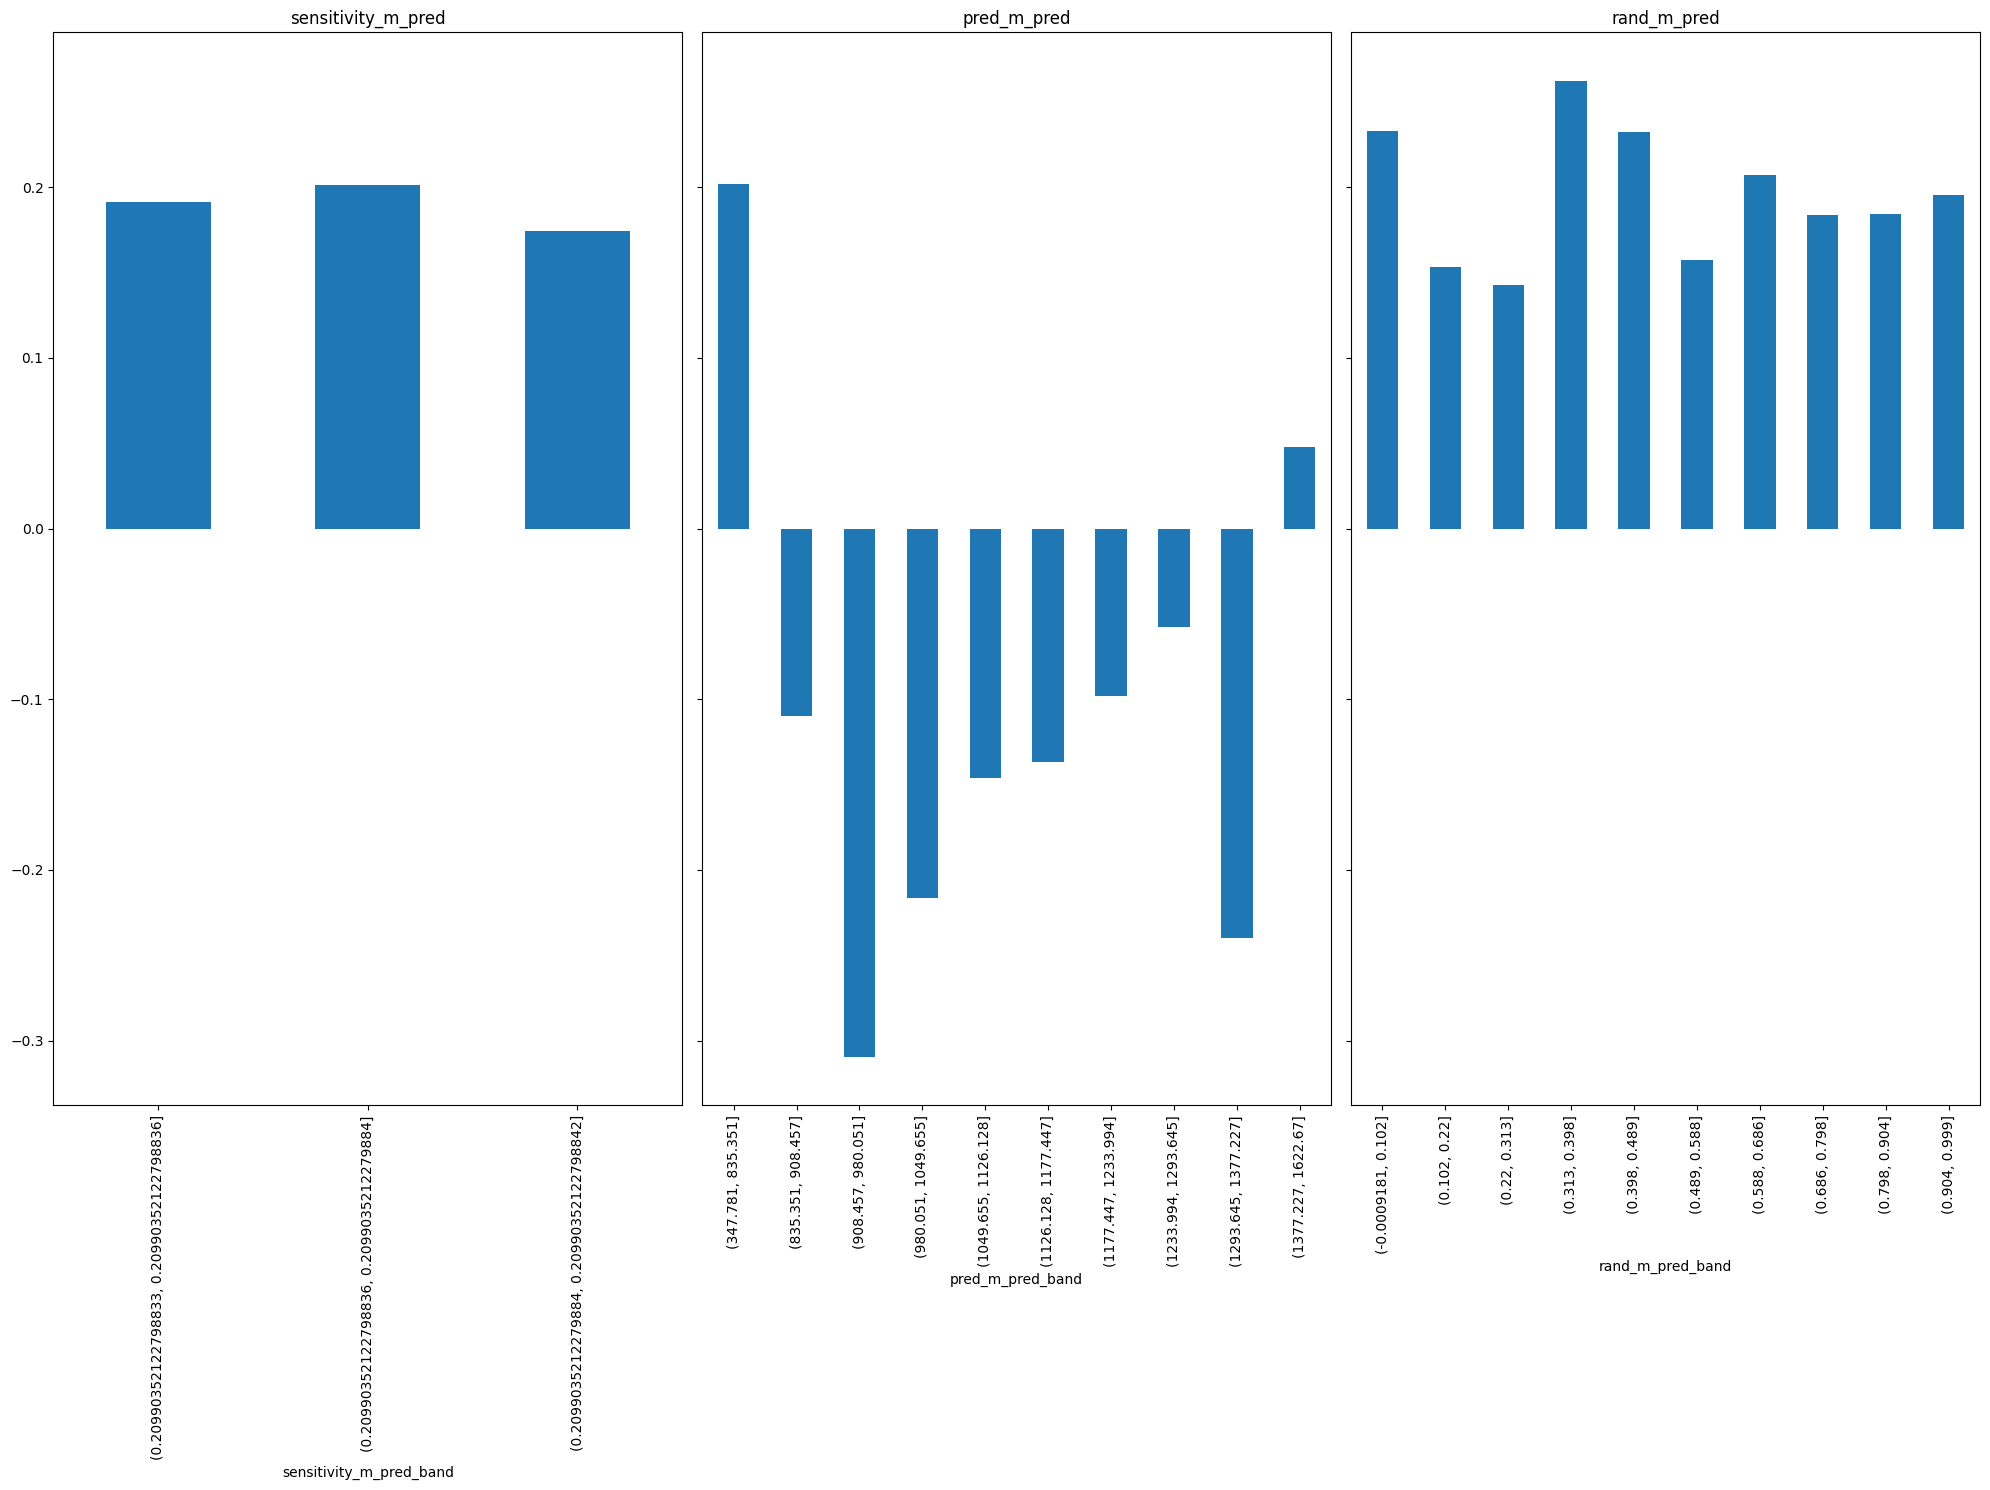

In [ ]:
import matplotlib.pyplot as plt
def sensitivity(data, y, t):
    return (np.sum((data[t] - data[t].mean()) * (data[y] - data[y].mean())) /
            np.sum((data[t] - data[t].mean()) ** 2))

def sensitivity_by_band(df, pred, y, t, bands=10):
    return (df
            .assign(**{f"{pred}_band": pd.qcut(df[pred], q=bands, duplicates='drop')})
            .groupby(f"{pred}_band")
            .apply(lambda x: sensitivity(x, y, t)))

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(20, 15))

for m, ax in zip(["sensitivity_m_pred", "pred_m_pred", "rand_m_pred"], axs):
    sensitivity_by_band(campaign_rnd_pred, m, "purchase_amount", "campaign").plot.bar(ax=ax, title=m)

plt.tight_layout()
plt.show()

**5 Plot the Cumulative Sensitivity Curve for Each Model** <br>
Visualize how sensitivity accumulates across the dataset for each model to compare their effectiveness at ordering sensitivity.

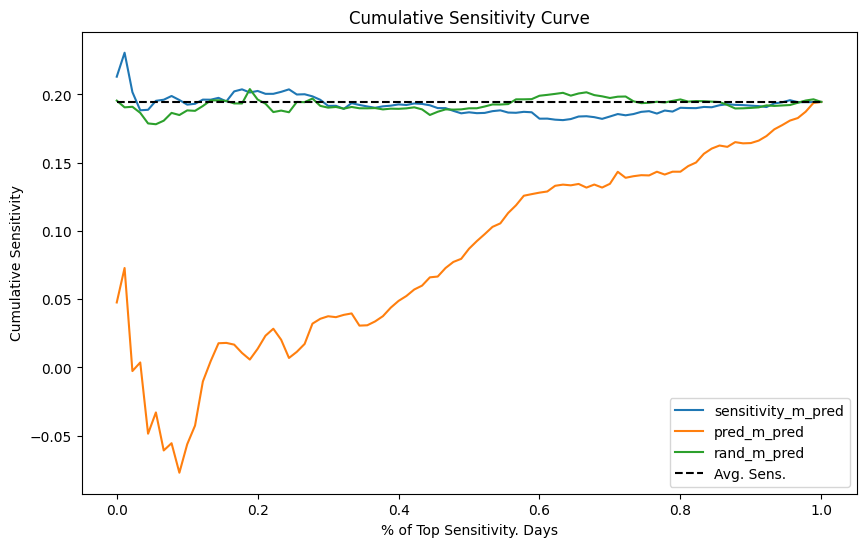

In [ ]:
def cumulative_sensitivity_curve(dataset, prediction, y, t, min_periods=30, steps=100):
    size = dataset.shape[0]
    ordered_df = dataset.sort_values(prediction, ascending=False).reset_index(drop=True)
    n_rows = list(range(min_periods, size, size // steps)) + [size]
    return np.array([sensitivity(ordered_df.head(rows), y, t) for rows in n_rows])

plt.figure(figsize=(10,6))

for m in ["sensitivity_m_pred", "pred_m_pred", "rand_m_pred"]:
    cumu_sens = cumulative_sensitivity_curve(campaign_rnd_pred, m, "purchase_amount", "campaign", min_periods=100, steps=100)
    x = np.array(range(len(cumu_sens)))
    plt.plot(x/x.max(), cumu_sens, label=m)

plt.hlines(sensitivity(campaign_rnd_pred, "purchase_amount", "campaign"), 0, 1, linestyles="--", color="black", label="Avg. Sens.")
plt.xlabel("% of Top Sensitivity. Days")
plt.ylabel("Cumulative Sensitivity")
plt.title("Cumulative Sensitivity Curve")
plt.legend();

- rand_m_pred (Random Model): This curve typically acts as a control, indicating the effectiveness of random guessing. If your predictive models closely align with this curve, it implies that they are not performing significantly better than random chance.
- sensitivity_m_pred: This line represents the effectiveness of the model that uses sensitivity analysis of the campaign data. If it aligns closely with the Random Model, it suggests that this model does not effectively discriminate between higher and lower purchase amounts based on the campaign spending.
- pred_m_pred (Predictive Model): This curve represents a predictive model that likely integrates campaign spending with demographic factors (age, gender, and income). If this curve rises above the others, especially the Random Model, it suggests that this model can better predict the outcome by utilizing all included features.

1. Performance Relative to Average Sensitivity: If the pred_m_pred curve consistently remains above the average sensitivity line, it indicates that when using the top-ranked data as predicted by the model, there is a greater-than-average influence of campaign spending on purchase amounts. This confirms the effectiveness of integrating comprehensive predictive analytics in campaign strategies.
2. Comparison Between Models: A curve for pred_m_pred that is higher than the rand_m_pred and sensitivity_m_pred curves suggests that integrating multiple variables (like age, gender, and income along with campaign spending) significantly improves the model's ability to predict which marketing efforts will lead to higher purchase amounts.
3. Flat or Close-to-Random Curves: If sensitivity_m_pred or even pred_m_pred closely follows the rand_m_pred, it may indicate that the model has limited predictive power or that the dataset requires more nuanced feature engineering, possibly integrating more or different features, or exploring non-linear relationships.


**6 Plot the Cumulative Gain Curve for Each Model** <br>
Examine the gain in sensitivity as more data is considered in each model, helping to identify which model leverages the most sensitive segments effectively.

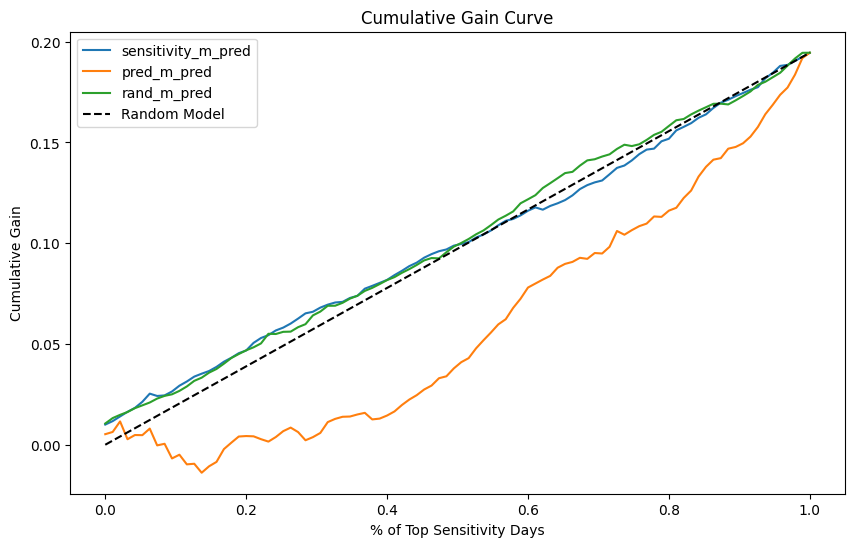

In [ ]:
def cumulative_gain(dataset, prediction, y, t, min_periods=30, steps=100):
    size = dataset.shape[0]
    ordered_df = dataset.sort_values(prediction, ascending=False).reset_index(drop=True)
    n_rows = list(range(min_periods, size, size // steps)) + [size]
    return np.array([(sensitivity(ordered_df.head(rows), y, t) * (rows/size)) for rows in n_rows])

plt.figure(figsize=(10,6))
for m in ["sensitivity_m_pred", "pred_m_pred", "rand_m_pred"]:
    cumu_gain = cumulative_gain(campaign_rnd_pred, m, "purchase_amount", "campaign", min_periods=50, steps=100)
    x = np.linspace(0, 1, len(cumu_gain))
    plt.plot(x, cumu_gain, label=m)

plt.plot([0, 1], [0, sensitivity(campaign_rnd_pred, "purchase_amount", "campaign")], linestyle="--", label="Random Model", color="black")

plt.xlabel("% of Top Sensitivity Days")
plt.ylabel("Cumulative Gain")
plt.title("Cumulative Gain Curve")
plt.legend()


1. rand_m_pred (Random Model): Represents a baseline where the prediction is as good as random guessing. This curve usually serves as a comparison point.
2. sensitivity_m_pred: If this curve is close to the Random Model, it indicates that the sensitivity-based model (possibly taking into account only the marketing campaign's sensitivity to changes in spending) does not perform much better than random in predicting higher purchase amounts.
3. pred_m_pred (Predictive Model): A half-curve shape that rises above the Random Model suggests that this model, which likely incorporates multiple features (age, gender, income, and campaign spend), better predicts higher purchase amounts as a result of increased campaign spending.

Since pred_m_pred shows a distinct improvement over the Random Model, it indicates that the model which integrates campaign spending with control variables (age, gender, income) can more effectively predict customer purchase amounts. This suggests a positive relationship between campaign spending and purchase amounts, enhanced by the inclusion of demographic and income factors in the model. (The result implies that, after accounting for age, gender, and income, increased spending on marketing campaigns is associated with increased purchase amounts among customers. This model appears to utilize the interaction or combined effect of these variables more effectively than models considering fewer variables.)

**7 Plot Sensitivity with Confidence Intervals for Each Model** <br>
Estimate and visualize the confidence intervals around the sensitivity calculations to assess the statistical robustness of each model’s predictions.

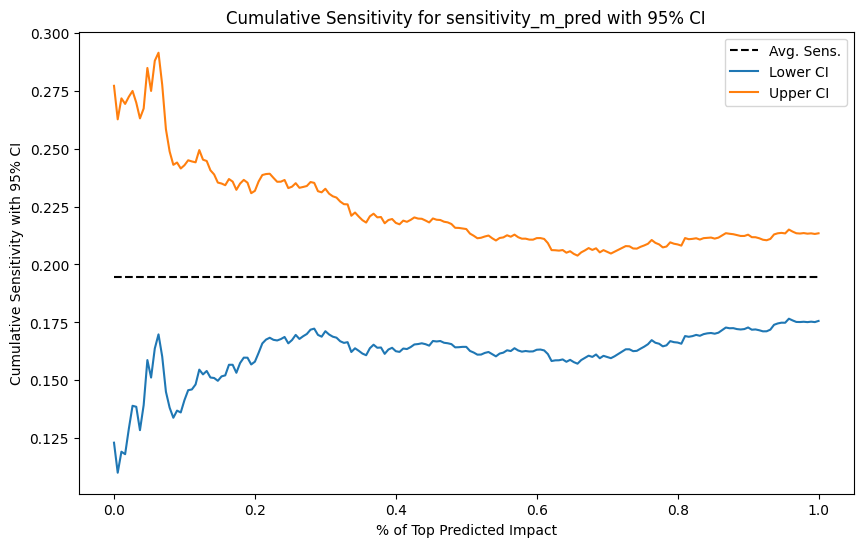

In [ ]:
def sensitivity_ci(df, y, t, z=1.96):
    n = df.shape[0]
    t_bar = df[t].mean()
    beta1 = sensitivity(df, y, t)
    beta0 = df[y].mean() - beta1 * t_bar
    e = df[y] - (beta0 + beta1 * df[t])
    se = np.sqrt(((1/(n-2))*np.sum(e**2))/np.sum((df[t] - t_bar)**2))
    return np.array([beta1 - z*se, beta1 + z*se])

def cumulative_sensitivity_curve_ci(dataset, prediction, y, t, min_periods=30, steps=100):
    size = dataset.shape[0]
    ordered_df = dataset.sort_values(prediction, ascending=False).reset_index(drop=True)
    n_rows = list(range(min_periods, size, size // steps)) + [size]
    return np.array([sensitivity_ci(ordered_df.head(rows), y, t) for rows in n_rows])

plt.figure(figsize=(10,6))
cumu_sens_ci = cumulative_sensitivity_curve_ci(campaign_rnd_pred, "sensitivity_m_pred", "purchase_amount", "campaign", min_periods=50, steps=200)
x = np.linspace(0, 1, len(cumu_sens_ci))
plt.hlines(sensitivity(campaign_rnd_pred, "purchase_amount", "campaign"), 0, 1, linestyles="--", color="black", label="Avg. Sens.")
plt.plot(x, cumu_sens_ci[:,0], label="Lower CI")
plt.plot(x, cumu_sens_ci[:,1], label="Upper CI")
plt.xlabel("% of Top Predicted Impact")
plt.ylabel("Cumulative Sensitivity with 95% CI")
plt.title("Cumulative Sensitivity for sensitivity_m_pred with 95% CI")
plt.legend()


- Lower and Upper Confidence Intervals (CI): These curves mark the bounds within which we expect the true sensitivity value to fall 95% of the time, given the model and data. If these bounds are wide, it indicates greater uncertainty in the estimates; narrower bounds suggest more precision.
- Horizontal Line (Average Sensitivity): Represents the average sensitivity of the entire dataset, serving as a baseline for comparison. This is the overall sensitivity without considering the sorting based on the model's predictions.

1. Narrowing Confidence Intervals: The fact that the confidence intervals narrow and approach the average sensitivity line as more data are considered (as represented by the x-axis percentage increase) typically indicates increasing stability and reliability in the sensitivity estimate. As the sample size increases (i.e., considering a larger percentage of your data), the statistical confidence in your estimates increases, thus reducing the uncertainty (narrower CI).
2. Initial Variability: The wider CI at lower percentages of the data suggests higher variability in the effect of the marketing campaign among those predicted to have the highest impact. This could be due to several factors such as outliers, higher variance in purchase amounts, or inconsistent effects of the campaign across different segments within this subset.
3. Convergence Towards Average Sensitivity: As the CI approaches the average sensitivity line, it suggests that adding more data (including those with lower predicted impacts from the campaign) tends to stabilize the estimate towards the overall average effect of the campaign across the entire dataset. This implies that while the most affected individuals (as predicted) may show variable responses, the general population tends to respond in a manner that is closer to the average observed effect.